<a href="https://colab.research.google.com/github/rafsunsheikh/BT_in_IS_research_retionale_analysis/blob/main/DSR_in_BT_SLR_LDA_50_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install numpy-2.3.1
!pip install gensim
!pip install pyLDAvis
!pip install wordcloud
# !pip install -U pip setuptools wheel
# !pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 71.1 MB/s eta 0:00:00


KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np

import re
import string
from os import path
from PIL import Image

import os
os.path

#Gensim
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# spacy for lemmatization
import spacy

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


/usr/local/lib/python3.11/dist-packages/spacy/cli/_util.py:23: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string
/usr/local/lib/python3.11/dist-packages/weasel/util/config.py:8: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string


In [2]:
# Import Dataset txt file - 305 research papers
file_path = "/content/Book1.xlsx"
data = pd.read_excel(file_path)

In [3]:
data.head()

,Title,Abstract,Author Keywords,Index Keywords
0,Overcoming the Data Transparency Trade-Off: De...,Blockchain’s inherent characteristics render i...,Blockchain technology; Construction industry; ...,NaN
1,Blockchain-based digital rights management sys...,Initially designed to protect intellectual pro...,Blockchain; Decentralization; Design principle...,NaN
2,Blockchain-based digital product passport: des...,Digital product passports (DPPs) will become a...,blockchain; circular manufacturing; circular s...,Supply chains; Block-chain; Circular manufactu...
3,Toward Seamless Mobility-as-a-Service: Providi...,With growing awareness of sustainability and c...,Coopetition; Digital identity; Digital wallet;...,NaN
4,"SCeFSTA: Smart Contract enabled Fair, Secure, ...",The healthcare transport sector has progressed...,NaN,Blockchain; Cost effectiveness; Distributed le...


In [4]:
#create a new dataframe from the data keeping only the columns "Title", "Abstract", "Author Keywords" and "Index Keywords"
data_text = data[['Title', 'Abstract', 'Author Keywords', 'Index Keywords']].copy()
data_text.head()

,Title,Abstract,Author Keywords,Index Keywords
0,Overcoming the Data Transparency Trade-Off: De...,Blockchain’s inherent characteristics render i...,Blockchain technology; Construction industry; ...,NaN
1,Blockchain-based digital rights management sys...,Initially designed to protect intellectual pro...,Blockchain; Decentralization; Design principle...,NaN
2,Blockchain-based digital product passport: des...,Digital product passports (DPPs) will become a...,blockchain; circular manufacturing; circular s...,Supply chains; Block-chain; Circular manufactu...
3,Toward Seamless Mobility-as-a-Service: Providi...,With growing awareness of sustainability and c...,Coopetition; Digital identity; Digital wallet;...,NaN
4,"SCeFSTA: Smart Contract enabled Fair, Secure, ...",The healthcare transport sector has progressed...,NaN,Blockchain; Cost effectiveness; Distributed le...


In [5]:
# prompt: can I concat the data from each row and put them in a new column as "text"?

data_text['text'] = data_text.apply(lambda row: ' '.join(row.astype(str)), axis=1)
data_text.head()

,Title,Abstract,Author Keywords,Index Keywords,text
0,Overcoming the Data Transparency Trade-Off: De...,Blockchain’s inherent characteristics render i...,Blockchain technology; Construction industry; ...,NaN,Overcoming the Data Transparency Trade-Off: De...
1,Blockchain-based digital rights management sys...,Initially designed to protect intellectual pro...,Blockchain; Decentralization; Design principle...,NaN,Blockchain-based digital rights management sys...
2,Blockchain-based digital product passport: des...,Digital product passports (DPPs) will become a...,blockchain; circular manufacturing; circular s...,Supply chains; Block-chain; Circular manufactu...,Blockchain-based digital product passport: des...
3,Toward Seamless Mobility-as-a-Service: Providi...,With growing awareness of sustainability and c...,Coopetition; Digital identity; Digital wallet;...,NaN,Toward Seamless Mobility-as-a-Service: Providi...
4,"SCeFSTA: Smart Contract enabled Fair, Secure, ...",The healthcare transport sector has progressed...,NaN,Blockchain; Cost effectiveness; Distributed le...,"SCeFSTA: Smart Contract enabled Fair, Secure, ..."


In [7]:
lda_data = data_text[['text']]
lda_data['index'] = lda_data.index
documents = lda_data


/tmp/ipython-input-4065784239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lda_data['index'] = lda_data.index


In [8]:
print(len(documents))
print(documents[:5])

348
                                                text  index
0  Overcoming the Data Transparency Trade-Off: De...      0
1  Blockchain-based digital rights management sys...      1
2  Blockchain-based digital product passport: des...      2
3  Toward Seamless Mobility-as-a-Service: Providi...      3
4  SCeFSTA: Smart Contract enabled Fair, Secure, ...      4


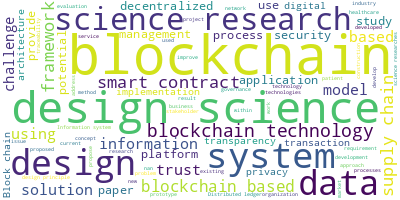

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(documents['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [10]:
# NLTK Stop words
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
documents['text']=documents['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/tmp/ipython-input-1904734973.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  documents['text']=documents['text'].apply(remove_stopwords)


In [11]:
#Tokenize words and Clean-up text

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'et', 'al', 'doi', 'abstract', 'clinical', 'ml', 'cid', 'data', 'using', 'http','machine learning', 'used', 'ieee','receiv', 'infer', 'significant', 'patients', 'heart', 'cancer', 'none', 'model', 'university', 'research', 'editor', 'covid', 'ai', 'journal', 'features', 'learning', 'medical', 'informatio', 'treatment', 'health', 'consultant', 'care', 'risk', 'response', 'failure', 'learning', 'features','machine', 'mds', 'based', 'imaging', 'lime', 'hc', 'methods', 'university', 'tle', 'patients', 'mri', 'org', 'temporal', 'vol',
                   'network', 'pe', 'ct', 'alk', 'test', 'non', 'pet', 'two', 'set', 'inr', 'https', 'ac', 'vp', 'moto', 'ckd', 'cad', 'med', 'set', 'may', 'time', 'also', 'table', 'images', 'high', 'site', 'na', 'hf', 'sites', 'chr', 'follow', 'image', 'asd', 'ados', 'social', 'items', 'user', 'food', 'rule', 'mobile', 'https', 'application', 'applications', 'new', 'early', 'process', 'jmir', 'full', 'ncr', 'one', 'med', 'plos', 'pone', 'fig', 'ts', 'line', 'number', 'pmid', 'pp', 'note', 'oa', 'vector', 'set', 'de', 'pd', 'word', 'auc', 'copd','iv'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data = documents.text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['overcoming', 'transparency', 'trade', 'designing', 'blockchain', 'delivery', 'invoice', 'system', 'construction', 'industry', 'blockchain', 'inherent', 'characteristics', 'render', 'promising', 'solution', 'collaborative', 'supply', 'chain', 'networks', 'however', 'technology', 'still', 'faces', 'challenges', 'coopetition', 'sharing', 'business', 'blockchains', 'requires']


In [12]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
stemmer.stem('numpang wifi stop gadget shopping')
'numpang wifi stop gadget shopping'

'numpang wifi stop gadget shopping'

In [14]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [15]:
doc = documents[documents['index'] == 213].values[0][0]
print('original document: ')
words = []
for word in doc.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc))

original document: 
['Taxonomy', 'digital', 'community', 'currency', 'platforms*', 'Community', 'currencies', 'used', 'pay', 'products', 'services', 'within', 'specific', 'groups', 'defined', 'geographical', 'boundaries', 'specific', 'common', 'interests.', 'Financial', 'crises,', 'social', 'emergence', 'developing', 'countries,', 'increased', 'access', 'digital', 'devices', 'stimulated', 'growing', 'number', 'communities', 'worldwide', 'develop', 'digital', 'currency', 'projects.', 'These', 'projects', 'use', 'technologies', 'ranging', 'traditional', 'plastic', 'cards', 'mobile', 'phones', 'blockchain', 'technologies.', 'Following', 'design', 'science', 'research', 'approach,', 'paper', 'analyzes', 'digital', 'community', 'currencies', '(DCCs)', 'developing', 'taxonomy', 'based', 'platform', 'architecture,', 'governance,', 'transactionality', 'virtuality.', 'By', 'investigating', '22', 'DCC', 'platforms', 'around', 'world,', '4', 'groups', 'distinguished:', 'local,', 'proprietary,', '

In [16]:
# Do lemmatization keeping only noun, adj, verb, adv
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
       output = []
       for sent in texts:
             doc = nlp(sent)
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [17]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 2), (13, 3), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 4), (25, 2), (26, 1), (27, 1), (28, 4), (29, 1)]


In [18]:
processed_docs = documents['text'].map(preprocess)
processed_docs[:50]

,text
0,"[overcom, data, transpar, trade, design, block..."
1,"[blockchain, base, digit, right, manag, system..."
2,"[blockchain, base, digit, product, passport, d..."
3,"[seamless, mobil, servic, provid, multimod, mo..."
4,"[scefsta, smart, contract, enabl, fair, secur,..."
5,"[hybrid, smart, detect, prevent, framework, sm..."
6,"[novel, framework, identifi, cybersecur, chall..."
7,"[design, govern, model, blockchain, base, trac..."
8,"[budgetari, control, adopt, consortium, blockc..."
9,"[formal, simul, token, aspect, blockchain, bas..."


In [19]:
#Create the Dictionary and Corpus needed for Topic Modeling

dictionary = corpora.Dictionary(data_words)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in data_words]

In [55]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=50, random_state=100,
                chunksize=1000, passes=100,iterations=100)

In [56]:
lda_model.print_topics()

[(8,
  '0.019*"blockchain" + 0.015*"design" + 0.015*"systems" + 0.013*"information" + 0.010*"predictive" + 0.010*"security" + 0.008*"digital" + 0.008*"science" + 0.008*"chain" + 0.008*"exchange"'),
 (42,
  '0.025*"blockchain" + 0.023*"design" + 0.021*"mhealth" + 0.014*"bitcoin" + 0.014*"privacy" + 0.012*"devices" + 0.012*"hipaa" + 0.012*"provide" + 0.010*"pervasive" + 0.010*"ability"'),
 (46,
  '0.026*"design" + 0.023*"blockchain" + 0.020*"digital" + 0.017*"payment" + 0.017*"forecast" + 0.016*"science" + 0.015*"scoring" + 0.013*"newsvendor" + 0.013*"proper" + 0.011*"expert"'),
 (24,
  '0.059*"product" + 0.052*"sustainability" + 0.040*"circular" + 0.038*"life" + 0.034*"cycle" + 0.033*"chain" + 0.027*"environmental" + 0.027*"value" + 0.025*"chains" + 0.025*"sustainable"'),
 (31,
  '0.037*"blockchain" + 0.017*"design" + 0.014*"system" + 0.012*"technology" + 0.012*"healthcare" + 0.010*"science" + 0.009*"database" + 0.008*"iot" + 0.008*"management" + 0.007*"identity"'),
 (4,
  '0.070*"desig

In [57]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19    -0.124083  0.011733       1        1  10.762077
23    -0.124024 -0.015992       2        1   5.513728
44    -0.130518 -0.026598       3        1   5.009742
2     -0.125920 -0.019661       4        1   4.510197
5     -0.087454 -0.029410       5        1   4.452353
31    -0.104109  0.057581       6        1   4.259080
35    -0.122540  0.009719       7        1   4.233065
49    -0.110430 -0.040806       8        1   3.987582
29    -0.099080 -0.064663       9        1   3.949640
11    -0.118072  0.045888      10        1   3.348977
48    -0.103628 -0.034075      11        1   3.323874
21    -0.096229  0.023786      12        1   3.249658
25    -0.113469 -0.036085      13        1   3.068202
15    -0.101290 -0.001727      14        1   2.944110
38    -0.095975 -0.021095      15        1   2.648048
47    -0.071866  0.014894      16        1   2.211612
17    -0.073286  0.007070      17        1   2.125282
40    -0.065226  0.068247      18        1   2.120235
1     -0.064759  0.075363      19        1   2.119048
28    -0.068991 -0.035842      20        1   1.997057
33    -0.073494 -0.067026      21        1   1.927845
4     -0.051781  0.066684      22        1   1.854039
32    -0.073327  0.007417      23        1   1.827191
9     -0.022091 -0.079629      24        1   1.525047
24     0.069033 -0.328313      25        1   1.318759
39     0.010526  0.048110      26        1   1.128677
41     0.005376  0.042387      27        1   1.077819
14     0.002559  0.031286      28        1   0.956357
36     0.016097  0.071034      29        1   0.923380
10     0.031302  0.017210      30        1   0.903931
46     0.045907  0.024784      31        1   0.879219
43     0.052778  0.002688      32        1   0.780691
42     0.091651  0.070620      33        1   0.763293
8      0.028529  0.048603      34        1   0.751260
27     0.052063 -0.099386      35        1   0.735161
12     0.059139  0.069754      36        1   0.734604
37     0.069330 -0.062100      37        1   0.717821
13     0.058091  0.022290      38        1   0.710496
3      0.070376  0.001163      39        1   0.629021
16     0.097022  0.069632      40        1   0.621630
34     0.080280 -0.022524      41        1   0.590716
45     0.118701  0.049768      42        1   0.496541
30     0.076722  0.061101      43        1   0.480020
6      0.092891  0.016487      44        1   0.467967
0      0.113566  0.031268      45        1   0.437465
18     0.121277 -0.027770      46        1   0.412789
7      0.183812 -0.017594      47        1   0.288816
22     0.210888 -0.012479      48        1   0.198120
26     0.231863 -0.011899      49        1   0.013879
20     0.231863 -0.011899      50        1   0.013879, topic_info=              Term         Freq        Total Category  logprob  loglift
10      blockchain  1699.000000  1699.000000  Default  30.0000  30.0000
30          design  1077.000000  1077.000000  Default  29.0000  29.0000
54     information   505.000000   505.000000  Default  28.0000  28.0000
61      management   347.000000   347.000000  Default  27.0000  27.0000
1000        energy    78.000000    78.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
20       companies     0.001238    53.878750  Topic50  -8.6268  -1.7983
21     competitors     0.001238     2.677705  Topic50  -8.6268   1.2035
22      complexity     0.001238    23.276071  Topic50  -8.6268  -0.9589
23        concerns     0.001238    23.995385  Topic50  -8.6268  -0.9894
24    construction     0.001238   190.643182  Topic50  -8.6268  -3.0619

[3227 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1477     14  0.894015     abaas
1291      5  0.073784   ability
1291      6  0.073784   ability
1291     13  0.073784   ability
1291     16  0.073784   ability
...     ...       ...  

In [58]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=348))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
# model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary)
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.632651825774241

Coherence Score:  0.312662919921836


In [51]:

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=100,
                chunksize=1000, passes=30,iterations=100 )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [52]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=data_words, start=2, limit=50, step=1)

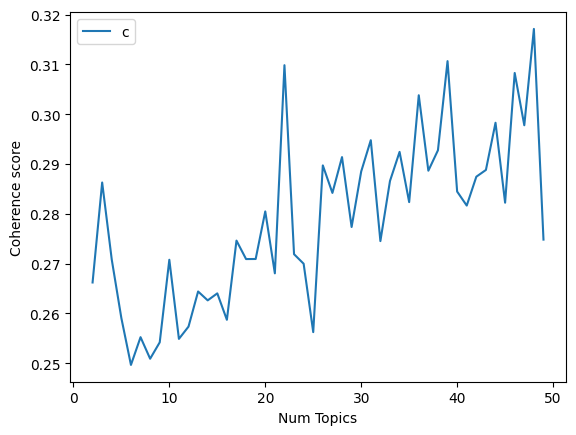

In [53]:

# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [54]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2662
Num Topics = 3  has Coherence Value of 0.2863
Num Topics = 4  has Coherence Value of 0.2708
Num Topics = 5  has Coherence Value of 0.2591
Num Topics = 6  has Coherence Value of 0.2497
Num Topics = 7  has Coherence Value of 0.2552
Num Topics = 8  has Coherence Value of 0.2509
Num Topics = 9  has Coherence Value of 0.2542
Num Topics = 10  has Coherence Value of 0.2708
Num Topics = 11  has Coherence Value of 0.2549
Num Topics = 12  has Coherence Value of 0.2574
Num Topics = 13  has Coherence Value of 0.2644
Num Topics = 14  has Coherence Value of 0.2626
Num Topics = 15  has Coherence Value of 0.264
Num Topics = 16  has Coherence Value of 0.2587
Num Topics = 17  has Coherence Value of 0.2746
Num Topics = 18  has Coherence Value of 0.2709
Num Topics = 19  has Coherence Value of 0.2709
Num Topics = 20  has Coherence Value of 0.2805
Num Topics = 21  has Coherence Value of 0.2681
Num Topics = 22  has Coherence Value of 0.3098
Num Topics = 23  has C

In [61]:
# Select the model and print the topics
optimal_model = model_list[20]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=20)

[(8,
  '0.036*"real" + 0.033*"estate" + 0.031*"blockchain" + 0.028*"design" + 0.025*"transaction" + 0.017*"science" + 0.015*"technology" + 0.015*"smart" + 0.013*"commercial" + 0.013*"conceptual" + 0.013*"information" + 0.012*"costs" + 0.010*"transactions" + 0.010*"transparency" + 0.010*"contracts" + 0.009*"study" + 0.009*"efficiency" + 0.007*"potential" + 0.007*"action" + 0.006*"multiple"'),
 (13,
  '0.036*"construction" + 0.032*"management" + 0.024*"blockchain" + 0.017*"system" + 0.016*"information" + 0.014*"project" + 0.012*"smart" + 0.011*"projects" + 0.011*"chain" + 0.011*"design" + 0.008*"bim" + 0.008*"digital" + 0.008*"contract" + 0.008*"stakeholders" + 0.007*"industry" + 0.007*"supply" + 0.006*"contracts" + 0.006*"decentralized" + 0.006*"science" + 0.006*"technology"'),
 (1,
  '0.031*"blockchain" + 0.022*"design" + 0.011*"science" + 0.011*"financial" + 0.011*"accounting" + 0.010*"system" + 0.009*"reporting" + 0.009*"big" + 0.009*"insurance" + 0.008*"healthcare" + 0.008*"claims" 

In [62]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19    -0.086307 -0.000011       1        1  21.481793
2     -0.085007 -0.001583       2        1  10.515189
5     -0.085298  0.025763       3        1  10.298085
15    -0.058561  0.001039       4        1   5.921871
11    -0.070458  0.015838       5        1   5.207696
21    -0.057090  0.011330       6        1   4.968741
1     -0.044273 -0.000122       7        1   4.384890
13    -0.086410  0.037248       8        1   4.371988
17    -0.019531 -0.032082       9        1   3.558948
9     -0.049026  0.002285      10        1   3.442955
14    -0.019346  0.126719      11        1   3.419982
3     -0.019388 -0.025617      12        1   3.260488
4     -0.016423  0.092242      13        1   3.155328
10     0.018919 -0.144957      14        1   2.924048
16     0.011781 -0.063340      15        1   2.523478
0      0.002605 -0.016938      16        1   2.444041
8      0.032272 -0.122774      17        1   2.052338
18     0.047893 -0.068464      18        1   1.875755
12     0.118295  0.023406      19        1   1.687929
6      0.070166  0.071695      20        1   1.321494
7      0.160729  0.040559      21        1   1.006756
20     0.234459  0.027764      22        1   0.176205, topic_info=             Term         Freq        Total Category  logprob  loglift
10     blockchain  1701.000000  1701.000000  Default  30.0000  30.0000
24   construction   189.000000   189.000000  Default  29.0000  29.0000
30         design  1074.000000  1074.000000  Default  28.0000  28.0000
54    information   505.000000   505.000000  Default  27.0000  27.0000
61     management   348.000000   348.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
200        impact     0.904241    50.174486  Topic22  -4.5746   2.3251
741    operations     0.500360    39.033179  Topic22  -5.1664   1.9844
82       solution     0.736534   124.751667  Topic22  -4.7798   1.2091
93   transparency     0.540833   116.282191  Topic22  -5.0886   0.9706
42       evaluate     0.379325    47.133959  Topic22  -5.4433   1.5189

[1494 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1477      4  0.899836      abaas
4535      9  0.773454        abm
255       1  0.138505     access
255       2  0.121192     access
255       3  0.069252     access
...     ...       ...        ...
1909     12  0.119580  worldwide
1909     15  0.119580  worldwide
1909     20  0.239160  worldwide
2275      2  0.897505        wrs
5518      3  0.941427        xsc

[4069 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 3, 6, 16, 12, 22, 2, 14, 18, 10, 15, 4, 5, 11, 17, 1, 9, 19, 13, 7, 8, 21])

In [63]:
#TFinding the dominant topic in each document

def format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=data_words):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]).to_frame().T], ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

     # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=doc_term_matrix, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# Show
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,19,0.5374,"blockchain, design, technology, science, chain...","[overcoming, transparency, trade, designing, b..."
1,1,3,0.7906,"blockchain, design, science, case, information...","[blockchain, digital, rights, management, syst..."
2,2,5,0.5399,"blockchain, information, design, systems, fram...","[blockchain, digital, product, passport, desig..."
3,3,2,0.994,"design, blockchain, trust, supply, chain, digi...","[toward, seamless, mobility, service, providin..."
4,4,4,0.9945,"design, systems, blockchain, science, informat...","[scefsta, smart, contract, enabled, fair, secu..."
5,5,19,0.8926,"blockchain, design, technology, science, chain...","[hybrid, smart, iot, detection, prevention, fr..."
6,6,2,0.5392,"design, blockchain, trust, supply, chain, digi...","[novel, framework, identify, cybersecurity, ch..."
7,7,19,0.9917,"blockchain, design, technology, science, chain...","[designing, governance, blockchain, traceabili..."
8,8,17,0.8778,"blockchain, design, science, architecture, tec...","[budgetary, control, adoption, consortium, blo..."
9,9,10,0.9954,"blockchain, design, credit, evaluation, financ...","[formalizing, simulating, token, aspects, bloc..."


In [67]:
#Find the most representative document for each topic
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(23)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0,0.9938,"blockchain, design, science, governance, payment, fractional, smart, accounting, circular, study","[ideachain, conceptual, proposal, blockchain, sti, policy, development, purpose, purpose, study,..."
1,1,0.996,"blockchain, design, science, financial, accounting, system, reporting, big, insurance, healthcare","[architectural, design, blockchain, enabled, federated, platform, algorithmic, fairness, predict..."
2,2,0.9958,"design, blockchain, trust, supply, chain, digital, science, systems, technology, study","[ensemble, design, cash, crops, warehouse, receipt, system, wrs, blockchain, smart, contracts, p..."
3,3,0.9946,"blockchain, design, science, case, information, water, market, study, systems, principles","[design, principles, blockchain, multi, sided, platform, sustainable, trade, water, affordance, ..."
4,4,0.9945,"design, systems, blockchain, science, information, digital, reporting, approach, technology, system","[scefsta, smart, contract, enabled, fair, secure, transparent, auction, healthcare, transportati..."
5,5,0.9974,"blockchain, information, design, systems, framework, science, digital, system, technology, manag...","[improving, diagnosis, digital, pathology, proof, concept, implementation, smart, contracts, dec..."
6,6,0.9948,"blockchain, design, management, architecture, system, production, bim, iot, end, science","[linking, permissioned, blockchain, internet, things, iot, bim, platform, production, management..."
7,7,0.9941,"emissions, blockchain, energy, sustainable, greenhouse, gas, ghg, system, hydrogen, scope","[green, designing, blockchain, certification, system, eu, hydrogen, market, energy, production, ..."
8,8,0.9944,"real, estate, blockchain, design, transaction, science, technology, smart, commercial, conceptual","[applying, action, design, science, develop, conceptual, design, smart, contracts, real, estate,..."
9,9,0.9947,"blockchain, chain, supply, design, smart, approach, science, gun, internal, systems","[supply, chain, traceability, blockchain, current, global, marketplace, supply, chains, span, hu..."


In [65]:
#Topic distribution across documents
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 5)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
pd.set_option('display.max_rows', None)
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,19,"blockchain, design, technology, science, chain, supply, management, business, framework, informa...",8.0,0.02299
1,3,"blockchain, design, science, case, information, water, market, study, systems, principles",15.0,0.04310
2,5,"blockchain, information, design, systems, framework, science, digital, system, technology, manag...",32.0,0.09195
3,2,"design, blockchain, trust, supply, chain, digital, science, systems, technology, study",12.0,0.03448
4,4,"design, systems, blockchain, science, information, digital, reporting, approach, technology, system",12.0,0.03448
5,19,"blockchain, design, technology, science, chain, supply, management, business, framework, informa...",37.0,0.10632
6,2,"design, blockchain, trust, supply, chain, digital, science, systems, technology, study",5.0,0.01437
7,19,"blockchain, design, technology, science, chain, supply, management, business, framework, informa...",3.0,0.00862
8,17,"blockchain, design, science, architecture, technology, cloud, study, business, companies, govern...",7.0,0.02011
9,10,"blockchain, design, credit, evaluation, financing, token, science, platform, proposed, market",12.0,0.03448


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
print(df_dominant_topics)

    Dominant_Topic  \
0                2   
1                7   
2                4   
3                4   
4                3   
5                2   
6                7   
7                7   
8                0   
9                7   
10               7   
11               4   
12               4   
13               7   
14               2   
15               4   
16               2   
17               3   
18               7   
19               7   
20               7   
21               3   
22               7   
23               4   
24               9   
25               4   
26               3   
27               1   
28               3   
29               8   
30               7   
31               1   
32               7   
33               2   
34               4   
35               8   
36               6   
37               3   
38               0   
39               2   
40               7   
41               1   
42               7   
43               2   
44        

In [ ]:
df_dominant_topics.to_csv('LDA_topic_modeling.csv')

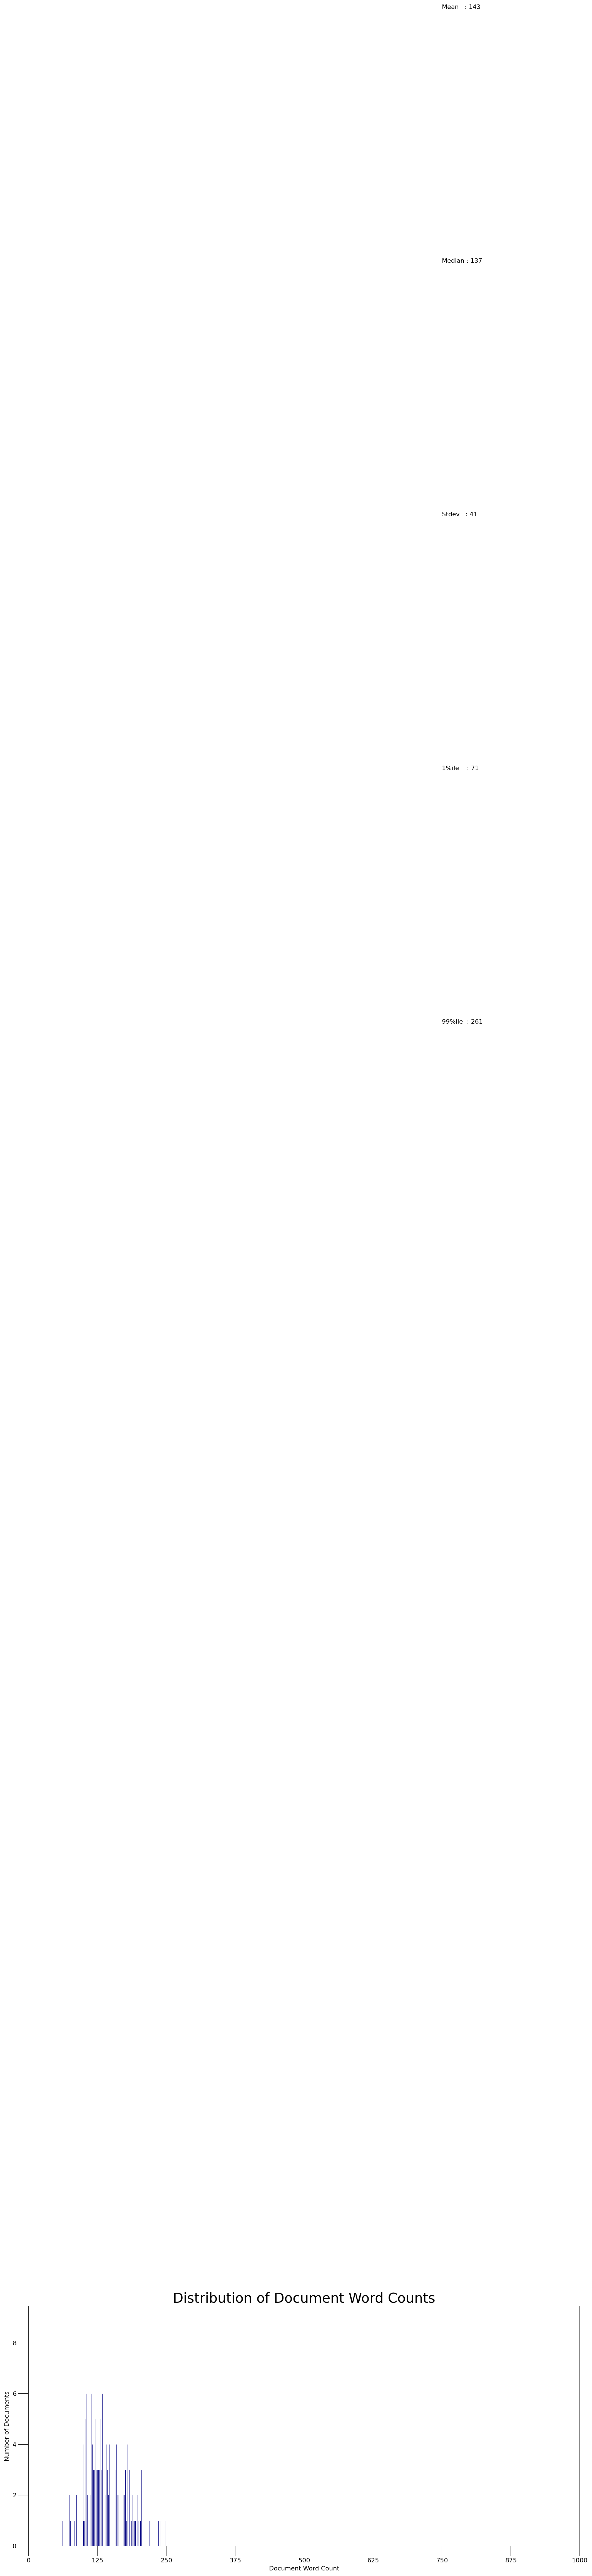

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

/tmp/ipython-input-1039900307.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
/tmp/ipython-input-1039900307.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
/tmp/ipython-input-1039900307.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
/tmp/ipython-input-1039900307.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens,

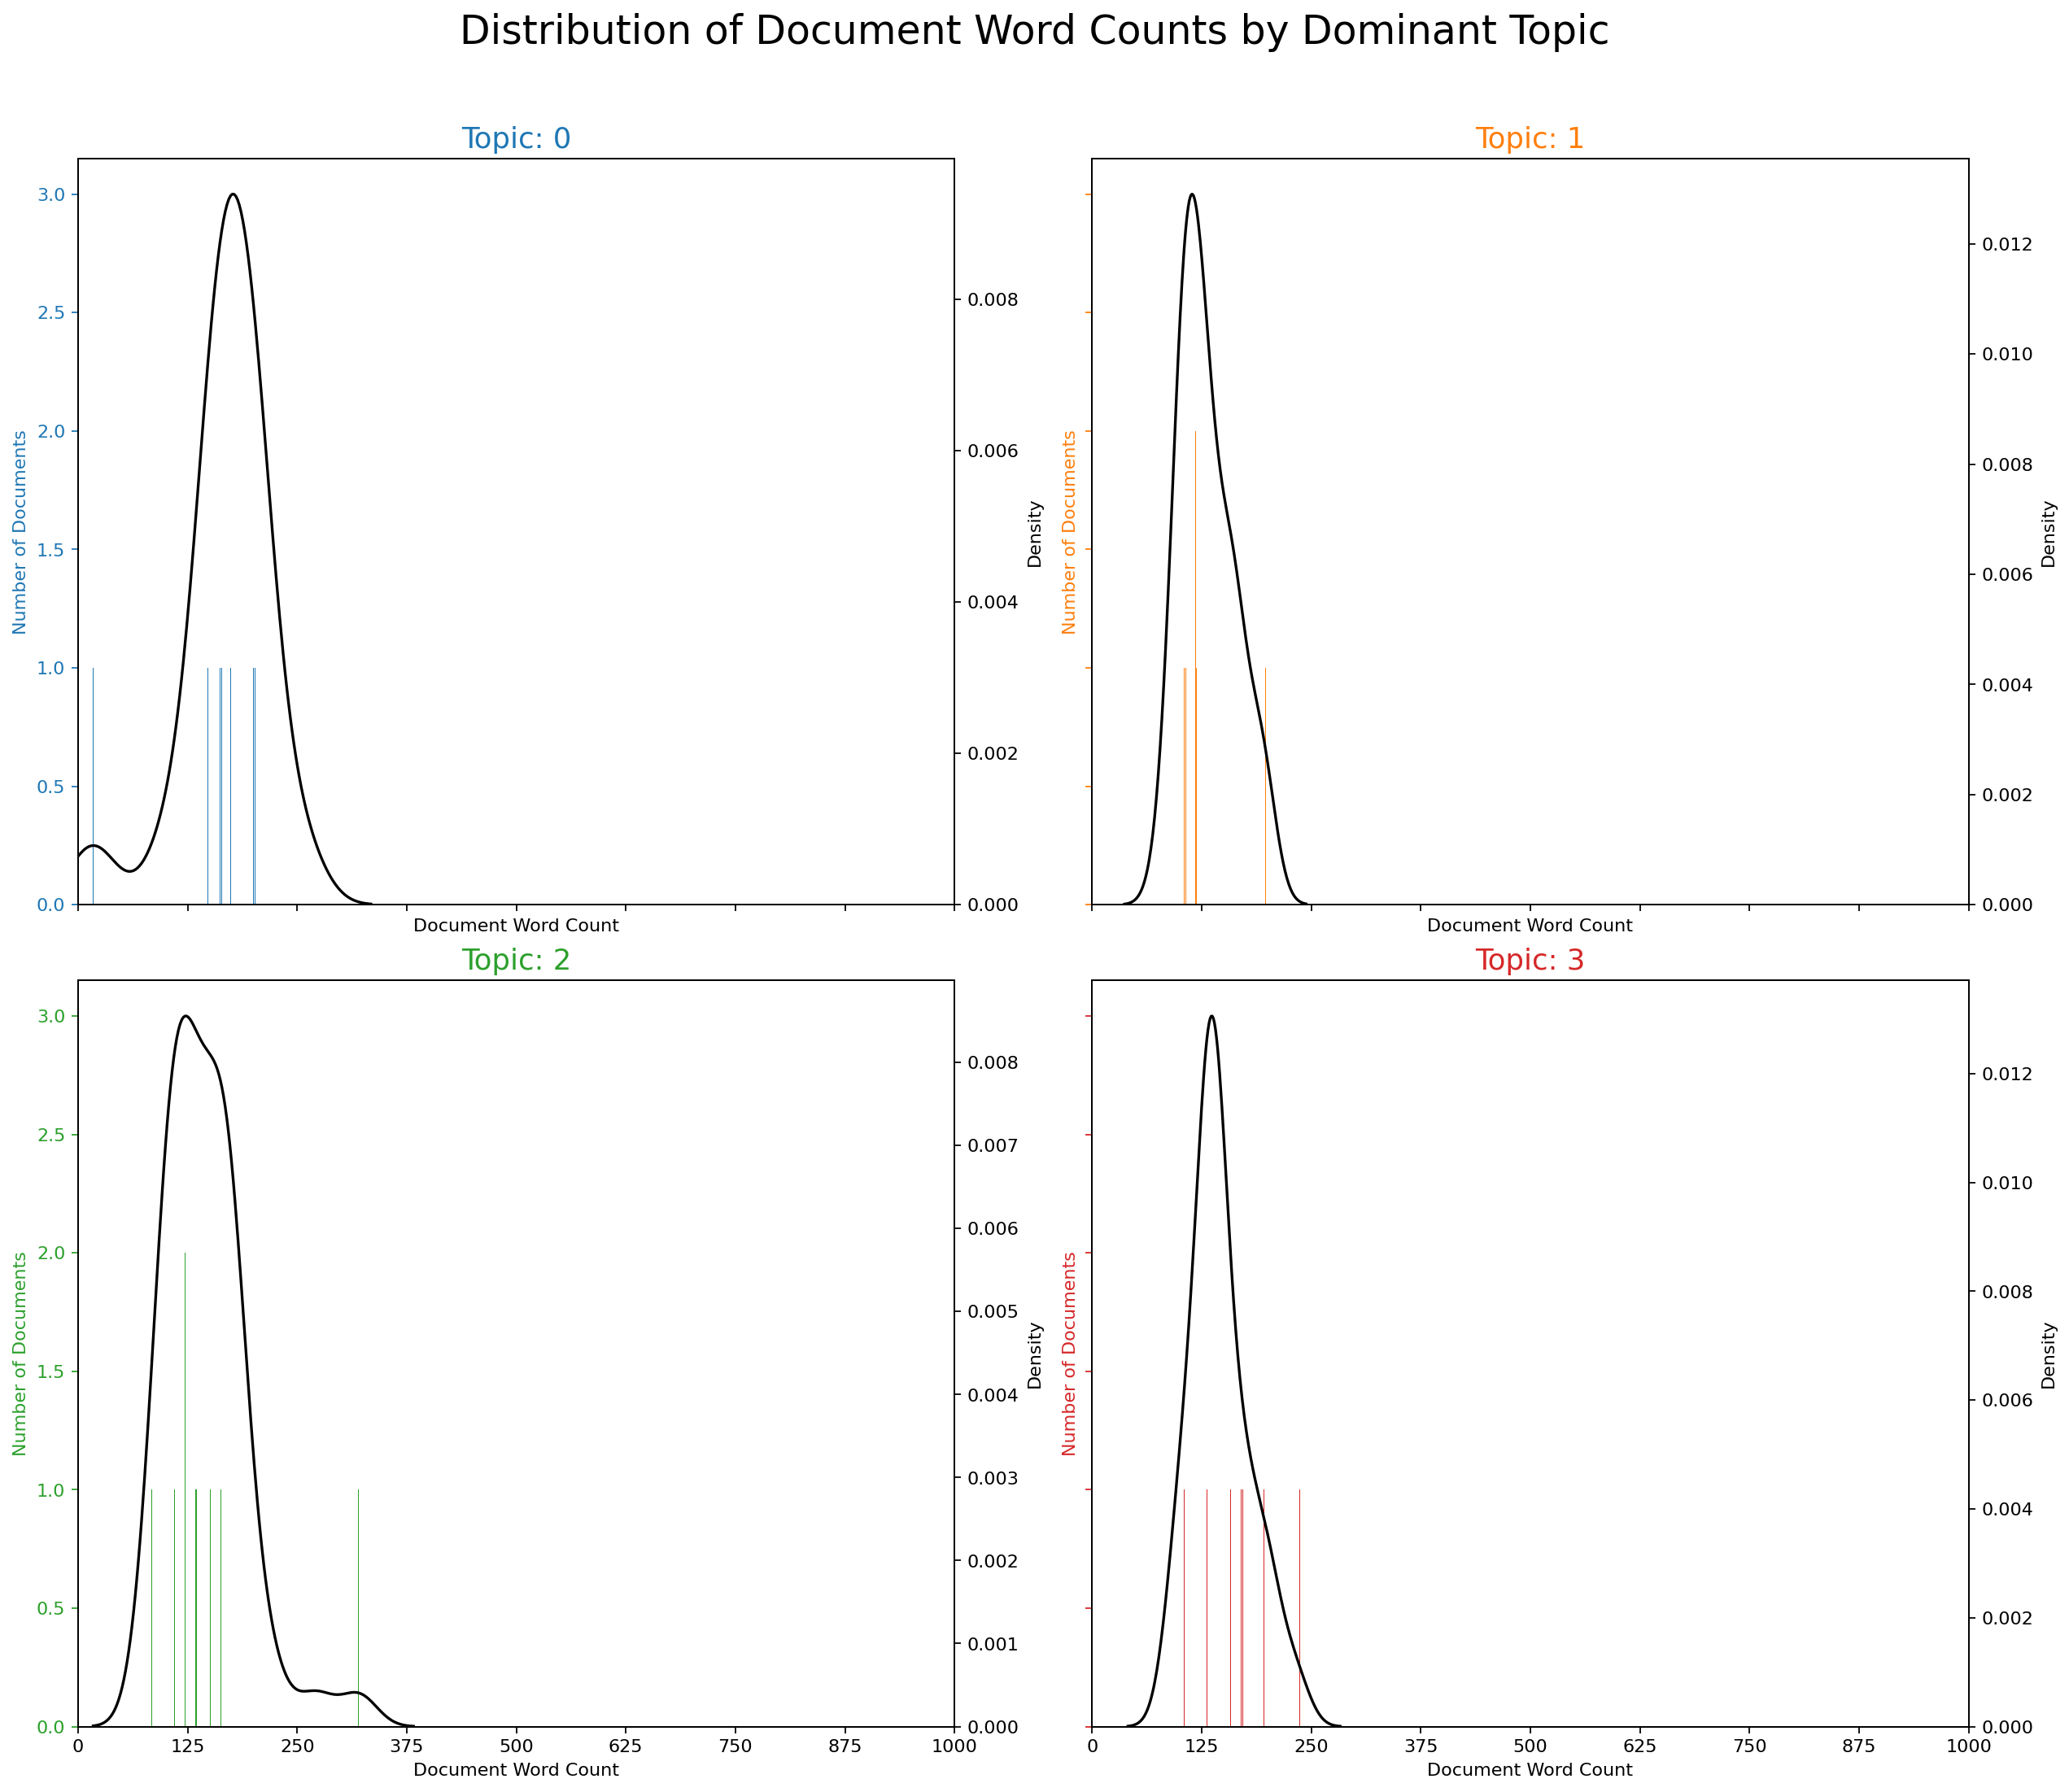

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

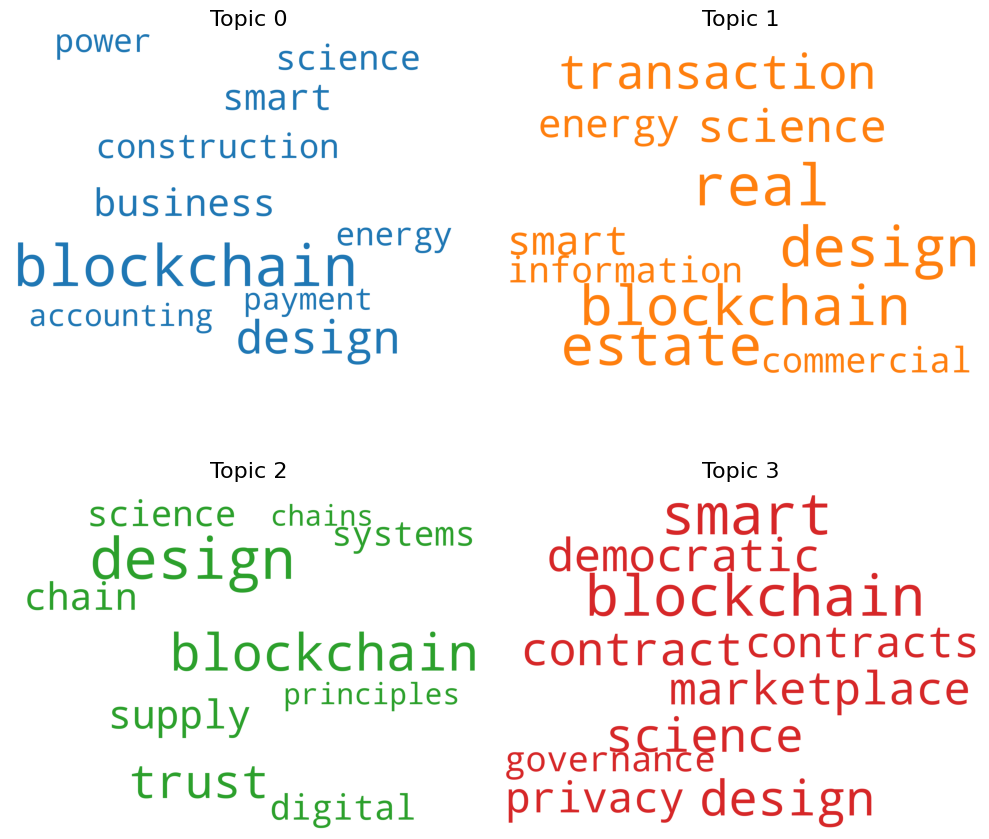

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2397584749.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/tmp/ipython-input-2397584749.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


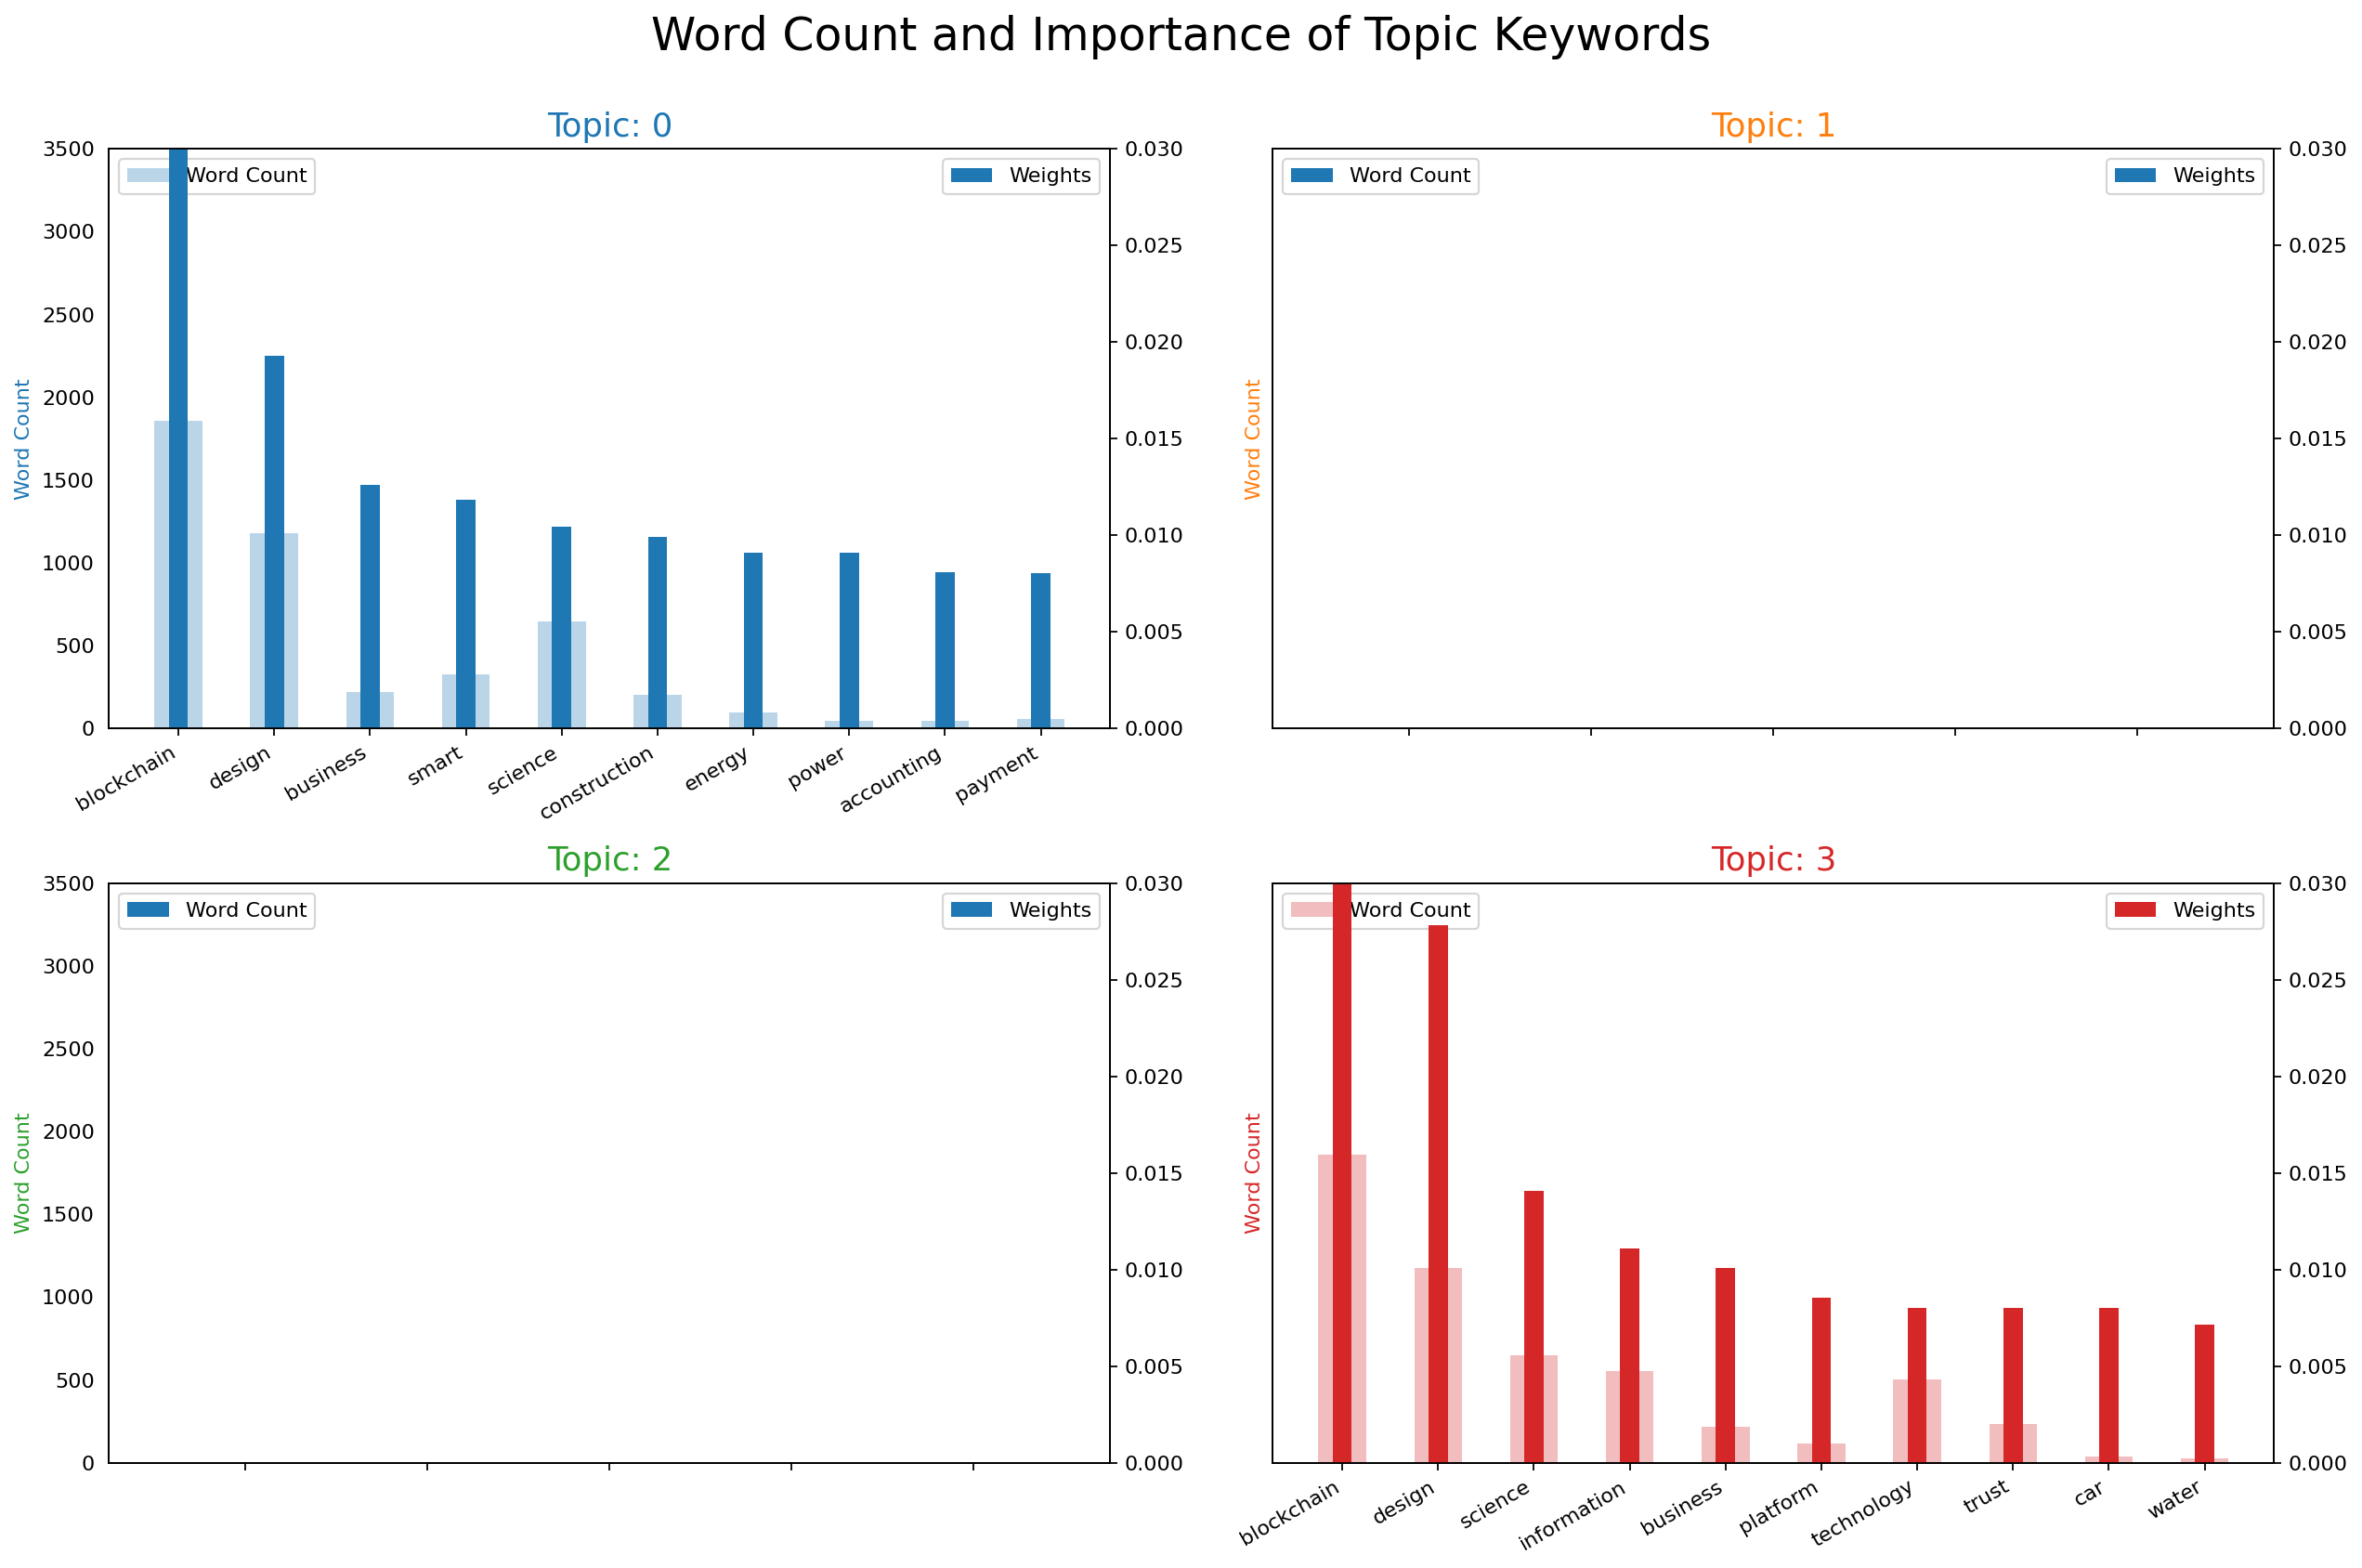

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

In [ ]:
data_text['text'] = data_text.apply(lambda row: ' '.join(row.astype(str)), axis=1)
data_text.head()

,Title,Abstract,Author Keywords,Index Keywords,text
0,Overcoming the Data Transparency Trade-Off: Designing a Blockchain-Based Delivery Invoice System...,Blockchain’s inherent characteristics render it a promising solution in collaborative supply cha...,Blockchain technology; Construction industry; Data transparency; Delivery invoices; Supply chain...,NaN,Overcoming the Data Transparency Trade-Off: Designing a Blockchain-Based Delivery Invoice System...
1,Blockchain-based digital rights management systems: Design principles for the music industry,Initially designed to protect intellectual property (IP) of digitalized information goods such a...,Blockchain; Decentralization; Design principles; Design science research; Digital rights managem...,NaN,Blockchain-based digital rights management systems: Design principles for the music industry Ini...
2,Blockchain-based digital product passport: design principles and demonstration,Digital product passports (DPPs) will become a reality for several regulated products in Europe....,blockchain; circular manufacturing; circular supply chain; Digital product passport; textile ind...,Supply chains; Block-chain; Circular manufacturing; Circular supply chain; Design Principles; De...,Blockchain-based digital product passport: design principles and demonstration Digital product p...
3,Toward Seamless Mobility-as-a-Service: Providing Multimodal Mobility Through Digital Wallets,"With growing awareness of sustainability and convenience expectations, customers are increasingl...",Coopetition; Digital identity; Digital wallet; MaaS; Self-sovereign identity,NaN,Toward Seamless Mobility-as-a-Service: Providing Multimodal Mobility Through Digital Wallets Wit...
4,"SCeFSTA: Smart Contract enabled Fair, Secure, and Transparent Auction for Healthcare Transportation","The healthcare transport sector has progressed considerably in recent years, yet it continues to...",NaN,Blockchain; Cost effectiveness; Distributed ledger; Health care; Redundancy; Block-chain; Cost e...,"SCeFSTA: Smart Contract enabled Fair, Secure, and Transparent Auction for Healthcare Transportat..."
